# Case Study 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('casestudy.csv')

In [3]:
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_email  685927 non-null  object 
 1   net_revenue     685927 non-null  float64
 2   year            685927 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 15.7+ MB


In [27]:
df.describe()

,net_revenue,year
count,685927.000000,685927.000000
mean,125.647755,2016.027252
std,71.854528,0.837203
min,1.000000,2015.000000
25%,63.510000,2015.000000
50%,125.730000,2016.000000
75%,187.820000,2017.000000
max,250.000000,2017.000000


In [28]:
df.isnull().sum().sort_values(ascending=False)

year              0
net_revenue       0
customer_email    0
dtype: int64

### A) Total Revenue for the Current Year

In [5]:
df.groupby('year').sum()['net_revenue']

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64

<AxesSubplot:xlabel='year'>

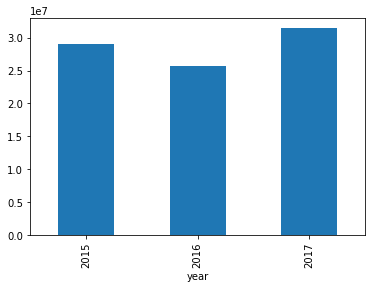

In [36]:
df.groupby('year').sum()['net_revenue'].plot(kind='bar')

### B) New Customer Revenue 

#### New Customers are those who are present in current year and not in previous year.
#### So for 2015 we will consider all the customers are new customers because our data starts from it.


#### For 2016 we will consider customers in 2016 who were not in 2015

In [6]:
df_1 = df[~df['customer_email'].isin(list(df[df['year'] == 2015]['customer_email']))]
df_1[df_1['year'] == 2016]['net_revenue'].sum()

18245491.01

#### For 2017 we will consider customers in 2017 who were not in 2016

In [7]:
df_1 = df[~df['customer_email'].isin(list(df[df['year'] == 2016]['customer_email']))]
df_1[df_1['year'] == 2017]['net_revenue'].sum()

28776235.039999995

### C) Existing Customer Growth

#### For 2015 the existing customer growth will be equal to the revenue because we dont have the data for 2014

#### For 2016, we assume existing customers means the customer who still exists from 2015 coming into 2016

In [8]:
names2016 = set(df[df['year']==2016]['customer_email'])
names2015 = set(df[df['year']==2015]['customer_email'])

cust_exist_2016= list(names2016.intersection(names2015))
cust_exist_2016_df = df[df['customer_email'].isin(cust_exist_2016)]
growth_2016 = cust_exist_2016_df[cust_exist_2016_df["year"]==2016]["net_revenue"].sum() - cust_exist_2016_df[cust_exist_2016_df["year"]==2015]["net_revenue"].sum()

print(growth_2016)

20335.459999999963


#### For 2017, we assume existing customers means the customer who still exists from 2016 coming into 2017

In [9]:
names2017 = set(df[df['year']==2017]['customer_email'])

cust_exist_2017= list(names2017.intersection(names2016))
cust_exist_2017_df = df[df['customer_email'].isin(cust_exist_2017)]
growth_2017 = cust_exist_2017_df[cust_exist_2017_df["year"]==2017]["net_revenue"].sum() - cust_exist_2017_df[cust_exist_2017_df["year"]==2016]["net_revenue"].sum()

print(growth_2017)

20611.340000000317


### D) Revenue lost from attrition

#### For 2015 the revenue attrition will be 0

#### 2016

In [10]:
df_1 = df[~df['customer_email'].isin(list(df[df['year'] == 2016]['customer_email']))]
df_1[df_1['year']==2015]['net_revenue'].sum()

21571632.070000004

#### 2017

In [11]:
df_1 = df[~df['customer_email'].isin(list(df[df['year'] == 2017]['customer_email']))]
df_1[df_1['year']==2016]['net_revenue'].sum()

23110294.939999998

### E) Existing Customer Revenue Current Year

#### For 2015 the existing customer revenue will be equal to the total 2015 revenue

#### 2016

In [12]:
exist_cust_rev_2016 = cust_exist_2016_df[cust_exist_2016_df["year"]==2016]["net_revenue"].sum() 
print(exist_cust_rev_2016)

7485452.58


#### 2017

In [13]:
exist_cust_rev_2017 = cust_exist_2017_df[cust_exist_2017_df["year"]==2017]["net_revenue"].sum() 
print(exist_cust_rev_2017)

2641259.99


### F) Existing Customer Revenue Prior Year

#### For 2015 the existing customer revenue will be equal to 0

#### 2016

In [14]:
exist_cust_rev_2016_prev = cust_exist_2016_df[cust_exist_2016_df["year"]==2015]["net_revenue"].sum() 
print(exist_cust_rev_2016_prev)

7465117.12


#### 2017

In [15]:
exist_cust_rev_2017_prev = cust_exist_2017_df[cust_exist_2017_df["year"]==2016]["net_revenue"].sum() 
print(exist_cust_rev_2017_prev)

2620648.65


### G) Total Customers Current Year


In [16]:
df.groupby('year').count()['customer_email']

year
2015    231294
2016    204646
2017    249987
Name: customer_email, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

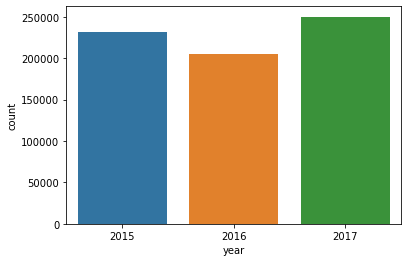

In [32]:
sns.countplot(x=df['year'],data=df)

### H) Total Customers Previous Year


#### In 2015 the total customers previous year will be 0

#### 2016

In [17]:
total_prev_2016=len(df[df['year']==2015]['customer_email'].unique())
print(total_prev_2016)

231294


#### 2017

In [18]:
l=names2015 and names2016
l=list(set(l))
total_prev_2017=len(l)
print(total_prev_2017)

204646


### I) New Customers


#### In 2015 we have no new customers as we dont have data of 2014

#### 2016

In [19]:
new_customers_2016 = (names2016 - ((names2015).intersection(names2016)))
new_customers_2016

{' bjdaejfdxp@gmail.com',
 ' sktpyilsli@gmail.com',
 'ugryryqenz@gmail.com ',
 'aknnvkndct@gmail.com',
 'ykdpyzeclk@gmail.com',
 ' cjozqfgwhp@gmail.com',
 'lmtcreevun@gmail.com',
 'fbuaqtrkjo@gmail.com',
 'agiioknhrw@gmail.com',
 ' tkgthvjlef@gmail.com',
 ' hcaqatahva@gmail.com',
 ' qxsydvmgub@gmail.com',
 ' ptfdvkfdct@gmail.com',
 'fggtrrxahu@gmail.com ',
 'kknteoxdjv@gmail.com',
 'qmtsvijmfu@gmail.com',
 'hsaehmrcnr@gmail.com',
 'sgpywwkqri@gmail.com',
 'xljlwweecz@gmail.com ',
 'bxzcsxsofz@gmail.com',
 'wgqdnfdybn@gmail.com ',
 'ngpzagffam@gmail.com',
 ' bkmuercdfy@gmail.com',
 ' cpahpzgwid@gmail.com',
 'lnfldaquhu@gmail.com ',
 ' uylkrrwngz@gmail.com',
 'ybqzmveszl@gmail.com',
 'tdyxqicodh@gmail.com',
 ' ykaxkkkfrr@gmail.com',
 'fyftamygll@gmail.com',
 'jnokexvgok@gmail.com',
 ' kxtckabzuv@gmail.com',
 ' syohsagtxe@gmail.com',
 ' sefkwwsukc@gmail.com',
 'qfiyjyqygs@gmail.com',
 ' jykmxnwrfz@gmail.com',
 ' gugkwuiuck@gmail.com',
 'ajnklxorxu@gmail.com',
 ' rzhouigjfw@gmail.com',
 'a

#### 2017

In [20]:
new_customers_2017 = (names2017 - ((names2016).intersection(names2017)))
new_customers_2017

{'scwiosnlcn@gmail.com',
 'mmgjblnngp@gmail.com ',
 ' fdfzmfoyqg@gmail.com',
 ' aiujjpuqzf@gmail.com',
 ' qjigwiimas@gmail.com',
 'emelkkzwln@gmail.com',
 'fkogrfbkvd@gmail.com',
 'vudatfazuz@gmail.com',
 'yxcrongeoj@gmail.com',
 ' kxqcklozyh@gmail.com',
 ' rhrzzgekbq@gmail.com',
 'enmhgpyppn@gmail.com ',
 'lpwxofqzow@gmail.com',
 ' vvrtpkkzqd@gmail.com',
 'tmspdikeaf@gmail.com',
 ' iygkacteyk@gmail.com',
 ' lodbrqipcf@gmail.com',
 'prmoexckmq@gmail.com ',
 'rsjrearrct@gmail.com',
 ' lizvncseae@gmail.com',
 ' bdnbbitiuo@gmail.com',
 ' fsutnfsmgt@gmail.com',
 'epvwmmvkhc@gmail.com',
 'nnfzlrckhr@gmail.com',
 ' zykqdslyvg@gmail.com',
 ' adgnsmmzsw@gmail.com',
 'bxtpomjlew@gmail.com ',
 'zizaatvekj@gmail.com',
 ' htdjoftizk@gmail.com',
 ' nwetlxlewg@gmail.com',
 'swkqbeonjq@gmail.com',
 'qrciojurxb@gmail.com',
 'ghyxdixdtf@gmail.com',
 ' gymjylohum@gmail.com',
 'fdqenyymwr@gmail.com',
 'atftvjsmpm@gmail.com',
 ' poeagvrxdw@gmail.com',
 'gqmtugjdco@gmail.com',
 'ywpzfzodbm@gmail.com',
 ' x

### J) Lost Customers


#### In 2015 we have no lost customer

#### 2016

In [23]:
lost_customers_2016 = (names2015 - ((names2015).intersection(names2016)))
lost_customers_2016

{'gdtpxhuxhp@gmail.com',
 ' ehixwocxcx@gmail.com',
 ' gflsrrvvqh@gmail.com',
 ' byylsuivkr@gmail.com',
 'sixenvvzlt@gmail.com',
 ' rmdcychkef@gmail.com',
 'ajlafrsgrz@gmail.com',
 'rdumicxbay@gmail.com',
 'qsxnwyihbo@gmail.com',
 'epfvtedfwa@gmail.com ',
 'oxgxuhhfrr@gmail.com',
 ' gqoqcxdroe@gmail.com',
 'zcrtigwtox@gmail.com',
 'whlpyfjyff@gmail.com',
 'oghhwddpss@gmail.com ',
 'rpxpafwcoz@gmail.com',
 ' aljocbeftg@gmail.com',
 ' waoxwmgggz@gmail.com',
 'wmxjxbyqqo@gmail.com',
 'lknglxrtes@gmail.com',
 'kuogkkpzon@gmail.com',
 'canfimlfzx@gmail.com',
 ' ppihadecqk@gmail.com',
 'rvybhcrjaf@gmail.com',
 'tiaatwxnyz@gmail.com',
 ' egkhxafuto@gmail.com',
 'pncvomgfku@gmail.com ',
 'lczieediri@gmail.com',
 'pmnfwtolfr@gmail.com',
 'uxtqqcvqpt@gmail.com',
 'qfljlguknp@gmail.com ',
 ' eljlopgquk@gmail.com',
 'yaertfswkt@gmail.com',
 'spxawstmzl@gmail.com',
 'nhanuzagnp@gmail.com',
 'qjsscafsnr@gmail.com',
 'tbulxlmldo@gmail.com',
 ' uvhwgsnsoj@gmail.com',
 'hcaiprrpay@gmail.com',
 'pbtapqel

#### 2017

In [24]:
lost_customers_2017 = (names2016 - ((names2016).intersection(names2017)))
lost_customers_2017

{' bjdaejfdxp@gmail.com',
 ' sktpyilsli@gmail.com',
 'ugryryqenz@gmail.com ',
 'fbuaqtrkjo@gmail.com',
 'agiioknhrw@gmail.com',
 ' zvdqvazubz@gmail.com',
 ' ptfdvkfdct@gmail.com',
 'fggtrrxahu@gmail.com ',
 'qmtsvijmfu@gmail.com',
 'hsaehmrcnr@gmail.com',
 'xljlwweecz@gmail.com ',
 'wgqdnfdybn@gmail.com ',
 ' bkmuercdfy@gmail.com',
 'lnfldaquhu@gmail.com ',
 'rclbcnovrg@gmail.com',
 'fyftamygll@gmail.com',
 ' sefkwwsukc@gmail.com',
 ' jykmxnwrfz@gmail.com',
 ' gugkwuiuck@gmail.com',
 ' aetraixsub@gmail.com',
 'ajnklxorxu@gmail.com',
 ' rzhouigjfw@gmail.com',
 'rumaaexzhj@gmail.com',
 'vbcmitipad@gmail.com',
 ' kjbawdeffb@gmail.com',
 'cpedfsruzc@gmail.com',
 ' urwasujeqr@gmail.com',
 ' fpolyljwez@gmail.com',
 'spvuganrzf@gmail.com',
 ' ixpnickilx@gmail.com',
 'yurelzjwhq@gmail.com',
 ' ppgtkwfqmj@gmail.com',
 'zonfaueyhf@gmail.com',
 ' uitqknkorw@gmail.com',
 'wtqslwyznb@gmail.com',
 'myehooztpr@gmail.com',
 ' xjqccnoeol@gmail.com',
 'rjnaucevei@gmail.com ',
 ' ptwsszlwbb@gmail.com',
 

### Visualizing NEW customers

In [61]:
df_2015 = df[df['year']==2015]
df_2015['NEW'] = 'NEW'

/opt/anaconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
df_2016 = df[df['year']==2016]

count_df = df[df['year'] != 2017]['customer_email'].value_counts().reset_index()
old = list(count_df[count_df['customer_email']>1]['index'])

df_2016['NEW'] = np.where(df_2016['customer_email'].isin(old), 'OLD', 'NEW')

/opt/anaconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [63]:
df_2017 = df[df['year']==2017]

count_df = df['customer_email'].value_counts().reset_index()
old = list(count_df[count_df['customer_email']>1]['index'])

df_2017['NEW'] = np.where(df_2017['customer_email'].isin(old), 'OLD', 'NEW')

/opt/anaconda3/envs/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [66]:
df_new = pd.concat([df_2015, df_2016, df_2017])

In [86]:
df_new.groupby(['year', 'NEW']).count().reset_index()

,year,NEW,customer_email,net_revenue
0,2015,NEW,231294,231294
1,2016,NEW,145062,145062
2,2016,OLD,59584,59584
3,2017,NEW,228262,228262
4,2017,OLD,21725,21725


In [85]:
df_new.groupby(['year', 'NEW']).sum().reset_index()

,year,NEW,net_revenue
0,2015,NEW,29036749.19
1,2016,NEW,18245491.01
2,2016,OLD,7485452.58
3,2017,NEW,28676607.64
4,2017,OLD,2740887.39


<AxesSubplot:xlabel='year', ylabel='count'>

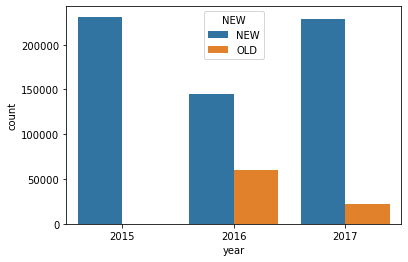

In [84]:
sns.countplot(x=df_new['year'],data=df_new,hue=df_new['NEW'])

#### This plot shows us distribution of new customers over 3 years